# 차기 신도시 아파트 공급을 위한 경기도 외각지역 위치 추천 &연도별 아파트 면적 선호도 추이
## 데이터 분석 및 시각화 과정 세미 프로젝트(M조) : 

## [배경] 현 거주지 선택이유 주된 응답

#### **처리목적**
- 공공데이터에서 관련 데이터를 수집해 서울/경기의 주된 거주지 선택 이유를 확인

#### **처리사항**
1. 전국의 해당 지역 거주지 선택 이유 데이터를 수집
2. 서울/경기 거주인들의 주된 선택 이유 추출
3. 결과를 시각화

#### **활용 데이터**
1. 서울 열린데이터 광장 : 현거주지_선택이유주된응답_20230207113449
(https://kosis.kr/statHtml/statHtml.do?orgId=116&tblId=DT_MLTM_6104&vw_cd=MT_ZTITLE&list_id=I1_14&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rc("font", family = "font_name")

In [2]:
# 중간과정 보이기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# 경고 표시 생략
import warnings
warnings.filterwarnings(action='ignore')

### 그래프에서 한글지원 되도록 하는 코드 삽입

In [4]:
# 차트 한글 보이게 하기
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 1. 데이터불러오기

In [5]:
# 현거주지_선택이유주된응답 가지고 오기
data = pd.read_csv('Pdata/현거주지_선택이유주된응답(2004년).csv',encoding='cp949')
data

,행정구역(시도)별,"가구주의 성,교육정도,연령,직업별",2004,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10
0,행정구역(시도)별,"가구주의 성,교육정도,연령,직업별",가구,경제적 능력에 맞추어,사업상직장,옛날부터 살아옴,교통편리,근린생활 시설편리,자녀교육 본인학업,자연환경이 좋아서,자녀육아 및 양육,경제적 가치가 오를 것 같아서,기타
1,전국,계,100,48.8,16.6,14.8,5.4,1,4.6,4.5,1.7,1.1,1.6
2,전국,동부,100,52.7,15.9,9.9,6.2,1.1,5.3,4.3,1.8,1.2,1.5
3,전국,읍면부,100,29.9,19.9,38,1.9,0.4,1.2,5.3,0.8,0.7,1.9
4,전국,단독주택,100,45.5,15.7,24,4.4,0.5,3,3.3,1.2,0.8,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,제주,중졸,100,43.1,13.8,29.3,3.7,1.6,2.6,4.5,-,-,1.3
284,제주,고졸,100,38.6,14.6,25.6,4.4,0.8,5.7,5.3,2.9,0.8,1.3
285,제주,대졸이상,100,44,15.2,15,4.8,1.5,10.1,5.3,3.3,0.6,0.2
286,제주,취학자녀 있음,100,42.9,10.5,20.3,6.3,1.8,10.2,5,2.6,0.4,-


### 불러온 데이터 파일의 행,열을 뒤집어서 컬럼 새로 지정

In [6]:
# 인덱스, 칼럼 뒤집기
data=data.T
data = data.set_index(0)
data

,1,2,3,4,5,6,7,8,9,10,...,278,279,280,281,282,283,284,285,286,287
0,,,,,,,,,,,,,,,,,,,,,
행정구역(시도)별,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,...,제주,제주,제주,제주,제주,제주,제주,제주,제주,제주
"가구주의 성,교육정도,연령,직업별",계,동부,읍면부,단독주택,아파트,기타,자기집,전세,보증부 월세,월세(사글세),...,40-49세,50-59세,60세이상,65세이상,초졸이하,중졸,고졸,대졸이상,취학자녀 있음,취학자녀 없음
가구,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
경제적 능력에 맞추어,48.8,52.7,29.9,45.5,49.7,56.2,44.1,54.8,62.1,60.5,...,42.4,39.2,25.3,21.9,29.1,43.1,38.6,44,42.9,36.1
사업상직장,16.6,15.9,19.9,15.7,17.4,17.1,13.6,19.9,19.6,22,...,13.7,15.5,6.4,4.2,4.9,13.8,14.6,15.2,10.5,13.9
옛날부터 살아옴,14.8,9.9,38,24,6.5,9.2,20.7,5.3,4.5,4.4,...,23,23.3,56.5,62.5,51.1,29.3,25.6,15,20.3,33.9
교통편리,5.4,6.2,1.9,4.4,6.5,5.5,5.6,6.1,4.7,4.7,...,4.9,7.8,3.8,3.9,5.6,3.7,4.4,4.8,6.3,3.7
근린생활 시설편리,1,1.1,0.4,0.5,1.7,0.4,1,1.1,0.8,0.3,...,0.9,1.2,0.6,-,-,1.6,0.8,1.5,1.8,0.4
자녀교육 본인학업,4.6,5.3,1.2,3,6.5,4.4,4.3,5.9,4.4,4,...,7.3,4.6,-,-,1.2,2.6,5.7,10.1,10.2,2.5


### 한눈에 보기 편하게 선택이유를 열로 다시 변환

In [7]:
# 열 변환
data= data.T
data

,행정구역(시도)별,"가구주의 성,교육정도,연령,직업별",가구,경제적 능력에 맞추어,사업상직장,옛날부터 살아옴,교통편리,근린생활 시설편리,자녀교육 본인학업,자연환경이 좋아서,자녀육아 및 양육,경제적 가치가 오를 것 같아서,기타
1,전국,계,100,48.8,16.6,14.8,5.4,1,4.6,4.5,1.7,1.1,1.6
2,전국,동부,100,52.7,15.9,9.9,6.2,1.1,5.3,4.3,1.8,1.2,1.5
3,전국,읍면부,100,29.9,19.9,38,1.9,0.4,1.2,5.3,0.8,0.7,1.9
4,전국,단독주택,100,45.5,15.7,24,4.4,0.5,3,3.3,1.2,0.8,1.6
5,전국,아파트,100,49.7,17.4,6.5,6.5,1.7,6.5,6.2,2.3,1.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,제주,중졸,100,43.1,13.8,29.3,3.7,1.6,2.6,4.5,-,-,1.3
284,제주,고졸,100,38.6,14.6,25.6,4.4,0.8,5.7,5.3,2.9,0.8,1.3
285,제주,대졸이상,100,44,15.2,15,4.8,1.5,10.1,5.3,3.3,0.6,0.2
286,제주,취학자녀 있음,100,42.9,10.5,20.3,6.3,1.8,10.2,5,2.6,0.4,-


### 불필요한 칼럼 제거

In [8]:
# 불필요 칼럼 제거1
data = data.drop('가구주의 성,교육정도,연령,직업별',axis=1)
data

,행정구역(시도)별,가구,경제적 능력에 맞추어,사업상직장,옛날부터 살아옴,교통편리,근린생활 시설편리,자녀교육 본인학업,자연환경이 좋아서,자녀육아 및 양육,경제적 가치가 오를 것 같아서,기타
1,전국,100,48.8,16.6,14.8,5.4,1,4.6,4.5,1.7,1.1,1.6
2,전국,100,52.7,15.9,9.9,6.2,1.1,5.3,4.3,1.8,1.2,1.5
3,전국,100,29.9,19.9,38,1.9,0.4,1.2,5.3,0.8,0.7,1.9
4,전국,100,45.5,15.7,24,4.4,0.5,3,3.3,1.2,0.8,1.6
5,전국,100,49.7,17.4,6.5,6.5,1.7,6.5,6.2,2.3,1.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...
283,제주,100,43.1,13.8,29.3,3.7,1.6,2.6,4.5,-,-,1.3
284,제주,100,38.6,14.6,25.6,4.4,0.8,5.7,5.3,2.9,0.8,1.3
285,제주,100,44,15.2,15,4.8,1.5,10.1,5.3,3.3,0.6,0.2
286,제주,100,42.9,10.5,20.3,6.3,1.8,10.2,5,2.6,0.4,-


In [9]:
# 불필요한 칼럼 제거2
data = data.drop('가구',axis=1)
data

,행정구역(시도)별,경제적 능력에 맞추어,사업상직장,옛날부터 살아옴,교통편리,근린생활 시설편리,자녀교육 본인학업,자연환경이 좋아서,자녀육아 및 양육,경제적 가치가 오를 것 같아서,기타
1,전국,48.8,16.6,14.8,5.4,1,4.6,4.5,1.7,1.1,1.6
2,전국,52.7,15.9,9.9,6.2,1.1,5.3,4.3,1.8,1.2,1.5
3,전국,29.9,19.9,38,1.9,0.4,1.2,5.3,0.8,0.7,1.9
4,전국,45.5,15.7,24,4.4,0.5,3,3.3,1.2,0.8,1.6
5,전국,49.7,17.4,6.5,6.5,1.7,6.5,6.2,2.3,1.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...
283,제주,43.1,13.8,29.3,3.7,1.6,2.6,4.5,-,-,1.3
284,제주,38.6,14.6,25.6,4.4,0.8,5.7,5.3,2.9,0.8,1.3
285,제주,44,15.2,15,4.8,1.5,10.1,5.3,3.3,0.6,0.2
286,제주,42.9,10.5,20.3,6.3,1.8,10.2,5,2.6,0.4,-


### 행정구역별로 이유를 확인

In [10]:
# 행정구역별 칼럼을 인덱스로 변경
data = data.set_index('행정구역(시도)별')
data

,경제적 능력에 맞추어,사업상직장,옛날부터 살아옴,교통편리,근린생활 시설편리,자녀교육 본인학업,자연환경이 좋아서,자녀육아 및 양육,경제적 가치가 오를 것 같아서,기타
행정구역(시도)별,,,,,,,,,,
전국,48.8,16.6,14.8,5.4,1,4.6,4.5,1.7,1.1,1.6
전국,52.7,15.9,9.9,6.2,1.1,5.3,4.3,1.8,1.2,1.5
전국,29.9,19.9,38,1.9,0.4,1.2,5.3,0.8,0.7,1.9
전국,45.5,15.7,24,4.4,0.5,3,3.3,1.2,0.8,1.6
전국,49.7,17.4,6.5,6.5,1.7,6.5,6.2,2.3,1.6,1.7
...,...,...,...,...,...,...,...,...,...,...
제주,43.1,13.8,29.3,3.7,1.6,2.6,4.5,-,-,1.3
제주,38.6,14.6,25.6,4.4,0.8,5.7,5.3,2.9,0.8,1.3
제주,44,15.2,15,4.8,1.5,10.1,5.3,3.3,0.6,0.2


## 2. 서울 거주민의 주거지 선택 이유 데이터프레임 및 시각화 자료 생성

### 서울행 추출

In [11]:
# 관측치중 서울만 불러서 새로운 데이터 프레임에 저장
data1 = data.loc['서울':'서울']
data1

,경제적 능력에 맞추어,사업상직장,옛날부터 살아옴,교통편리,근린생활 시설편리,자녀교육 본인학업,자연환경이 좋아서,자녀육아 및 양육,경제적 가치가 오를 것 같아서,기타
행정구역(시도)별,,,,,,,,,,
서울,53,14.5,11.5,7.2,0.8,5.9,2.9,1.7,0.9,1.5
서울,51.7,15.3,11.6,7.4,0.8,6,2.8,2,1,1.2
서울,58.3,11.4,10.8,6.2,1,5.6,3,0.4,0.4,2.8
서울,53.4,15.9,9.7,9.4,0.8,6,2,-,0.3,2.5
서울,50.9,19.3,8.9,7.2,1.1,3.9,2.2,3.6,1.2,1.7
서울,53,15.3,9,5.8,0.3,9.6,3.1,2.3,0.7,1
서울,57.6,11.4,13.5,7,1.4,5.6,1.6,-,0.9,1
서울,51.5,7.3,19.5,8.5,1,2.9,5.7,0.3,1.2,2
서울,49.3,6.3,19,8.8,1.2,2.4,7.9,0.5,1.2,3.5


### 데이터프레임의 변수 정보 확인

In [12]:
# 벨류의 데이터 타입 확인
data1 = data1.iloc[[0],] #서울시 평균값 행 추출
data1
data1.info()

,경제적 능력에 맞추어,사업상직장,옛날부터 살아옴,교통편리,근린생활 시설편리,자녀교육 본인학업,자연환경이 좋아서,자녀육아 및 양육,경제적 가치가 오를 것 같아서,기타
행정구역(시도)별,,,,,,,,,,
서울,53,14.5,11.5,7.2,0.8,5.9,2.9,1.7,0.9,1.5


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 서울 to 서울
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   경제적 능력에 맞추어       1 non-null      object
 1   사업상직장             1 non-null      object
 2   옛날부터 살아옴          1 non-null      object
 3   교통편리              1 non-null      object
 4   근린생활 시설편리         1 non-null      object
 5   자녀교육 본인학업         1 non-null      object
 6   자연환경이 좋아서         1 non-null      object
 7   자녀육아 및 양육         1 non-null      object
 8   경제적 가치가 오를 것 같아서  1 non-null      object
 9   기타                1 non-null      object
dtypes: object(10)
memory usage: 88.0+ bytes


### 문자형 데이터를 실수로 변환

In [13]:
# 계산하기 보다 편리하게 문자형 데이터를 실수로 변환
data1 = data1.astype('float')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 서울 to 서울
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   경제적 능력에 맞추어       1 non-null      float64
 1   사업상직장             1 non-null      float64
 2   옛날부터 살아옴          1 non-null      float64
 3   교통편리              1 non-null      float64
 4   근린생활 시설편리         1 non-null      float64
 5   자녀교육 본인학업         1 non-null      float64
 6   자연환경이 좋아서         1 non-null      float64
 7   자녀육아 및 양육         1 non-null      float64
 8   경제적 가치가 오를 것 같아서  1 non-null      float64
 9   기타                1 non-null      float64
dtypes: float64(10)
memory usage: 88.0+ bytes


### 서울 거주민의 주거지 선택 이유 시각화

<AxesSubplot:xlabel='0'>

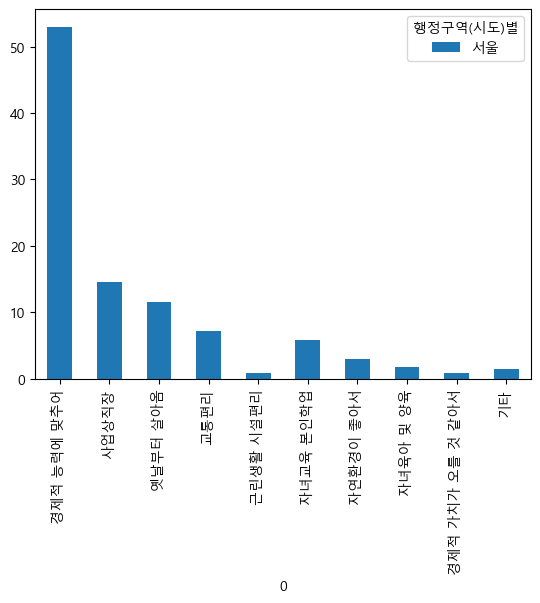

In [14]:
# 막대 그래프에 서울 데이터 시각화
data1.T.plot.bar()

## 3. 경기 거주민의 주거지 선택 이유 데이터프레임 및 시각화 자료 생성

### 경기행 추출

In [15]:
# 경기도만 불러오기
data2 = data.loc['경기':'경기'] 
data2

,경제적 능력에 맞추어,사업상직장,옛날부터 살아옴,교통편리,근린생활 시설편리,자녀교육 본인학업,자연환경이 좋아서,자녀육아 및 양육,경제적 가치가 오를 것 같아서,기타
행정구역(시도)별,,,,,,,,,,
경기,51.4,17.9,10,5.2,1.1,3.4,6.3,1.5,1.8,1.5
경기,50.2,19,9.8,5.3,1,3.6,6.6,1.4,1.9,1.2
경기,55.5,13.8,10.6,4.6,1.4,2.6,5.5,1.8,1.7,2.6
경기,58.9,19.5,7,6.2,0.5,2.5,2.8,-,0.9,1.7
경기,47.6,24.7,8.2,4.1,1.5,3.2,4.8,3.6,1.4,0.8
경기,53.6,16.2,6.7,5.1,0.9,6,7.1,1.2,1.9,1.4
경기,56.3,17.5,9.6,4.7,1.3,2.4,6,-,2,0.3
경기,44.7,9,21.3,7.2,0.9,-,9.5,0.5,2.6,4.3
경기,44.6,7.4,22.5,7.5,1,-,9.1,0.5,0.9,6.6


### 데이터프레임의 변수 정보 확인

In [16]:
# 데이터 타입 확인
data2 = data2.iloc[[0],] #경기도의 평균값 행 추출
data2
data2.info()

,경제적 능력에 맞추어,사업상직장,옛날부터 살아옴,교통편리,근린생활 시설편리,자녀교육 본인학업,자연환경이 좋아서,자녀육아 및 양육,경제적 가치가 오를 것 같아서,기타
행정구역(시도)별,,,,,,,,,,
경기,51.4,17.9,10,5.2,1.1,3.4,6.3,1.5,1.8,1.5


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 경기 to 경기
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   경제적 능력에 맞추어       1 non-null      object
 1   사업상직장             1 non-null      object
 2   옛날부터 살아옴          1 non-null      object
 3   교통편리              1 non-null      object
 4   근린생활 시설편리         1 non-null      object
 5   자녀교육 본인학업         1 non-null      object
 6   자연환경이 좋아서         1 non-null      object
 7   자녀육아 및 양육         1 non-null      object
 8   경제적 가치가 오를 것 같아서  1 non-null      object
 9   기타                1 non-null      object
dtypes: object(10)
memory usage: 88.0+ bytes


### 문자형 데이터를 실수로 변환

In [17]:
# 문자형 실수형으로 바꾸기
data2 = data2.astype('float')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 경기 to 경기
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   경제적 능력에 맞추어       1 non-null      float64
 1   사업상직장             1 non-null      float64
 2   옛날부터 살아옴          1 non-null      float64
 3   교통편리              1 non-null      float64
 4   근린생활 시설편리         1 non-null      float64
 5   자녀교육 본인학업         1 non-null      float64
 6   자연환경이 좋아서         1 non-null      float64
 7   자녀육아 및 양육         1 non-null      float64
 8   경제적 가치가 오를 것 같아서  1 non-null      float64
 9   기타                1 non-null      float64
dtypes: float64(10)
memory usage: 88.0+ bytes


### 서울 거주민의 주거지 선택 이유 시각화

<AxesSubplot:xlabel='0'>

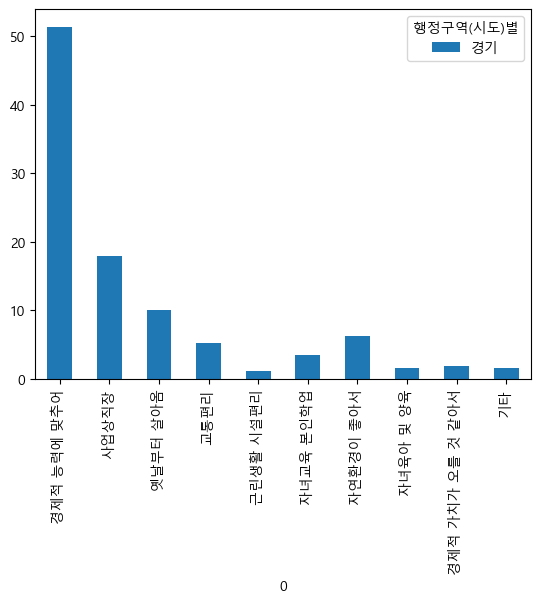

In [18]:
# 경기도 데이터 시각화
data2.T.plot.bar()

## 3. 서울,경기 프레임 합쳐서 시각화

In [19]:
# 경기, 서울 데이터 프레임 합치기 후 내림차순으로 정렬
data3=pd.concat([data1,data2])
data3= data3.sort_values(by='서울', ascending=True, axis=1) #sort_value는 원래 열->행별로
data3

,근린생활 시설편리,경제적 가치가 오를 것 같아서,기타,자녀육아 및 양육,자연환경이 좋아서,자녀교육 본인학업,교통편리,옛날부터 살아옴,사업상직장,경제적 능력에 맞추어
행정구역(시도)별,,,,,,,,,,
서울,0.8,0.9,1.5,1.7,2.9,5.9,7.2,11.5,14.5,53.0
경기,1.1,1.8,1.5,1.5,6.3,3.4,5.2,10.0,17.9,51.4


<AxesSubplot:title={'center':'현주거지 선택 주된 이유 시각화'}, ylabel='이동사유'>

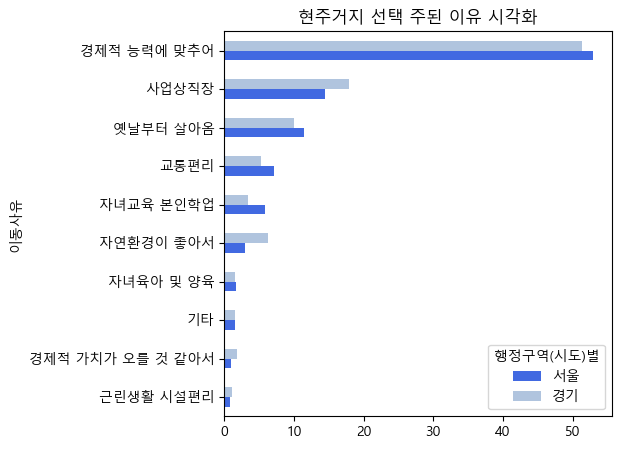

In [20]:
# 합친 데이터 프레임 색상 선정, 사이즈 선정, 제목 선정, 축 이름 선정 후 시각화
my_colors = [ 'royalblue','lightsteelblue'] 
data3 = data3.T.plot.barh(figsize=(5,5), color=my_colors, title = '현주거지 선택 주된 이유 시각화',
                       xlabel = '이동사유', ylabel = '응답')

data3

### 결론
- 지역별 미미한 차이는 있으나, 경제적인 이유가 약 50%를 차지할 정도로 압도적임.
- 경제적 이유 외 교통편리, 교육, 근린시설 등 인프라가 선택 이유를 차지함.